In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from artifact import Artifacts, ArtifactList
from stage import Stage

In [3]:
Artifacts.display()

In [4]:
#from examples import lr_vs_rf, which_is_best
from examples import simple_lr, simple_rf, simple_lr_unbalanced, compare_all

Artifact 'training_data'
Artifact 'testing_data'
Artifact 'model'
Artifact 'score'
Artifact 'scores'
Artifact 'max_score'


In [5]:
compare_all

compare_algs(name='compare_all', alg_experiments=[test_sklearn_alg(name='simple_lr', model_type=<class 'sklearn.linear_model._logistic.LogisticRegression'>, n=1, balanced=True, test_percent=1, seed=1), test_sklearn_alg(name='simple_rf', model_type=<class 'sklearn.ensemble._forest.RandomForestClassifier'>, n=1, balanced=1, test_percent=1, seed=2), test_sklearn_alg(name='simple_lr_unbalanced', model_type=<class 'sklearn.ensemble._forest.RandomForestClassifier'>, n=1, balanced=1, test_percent=1, seed=3)])

In [6]:
compare_all.outputs

Artifact 'max_score'

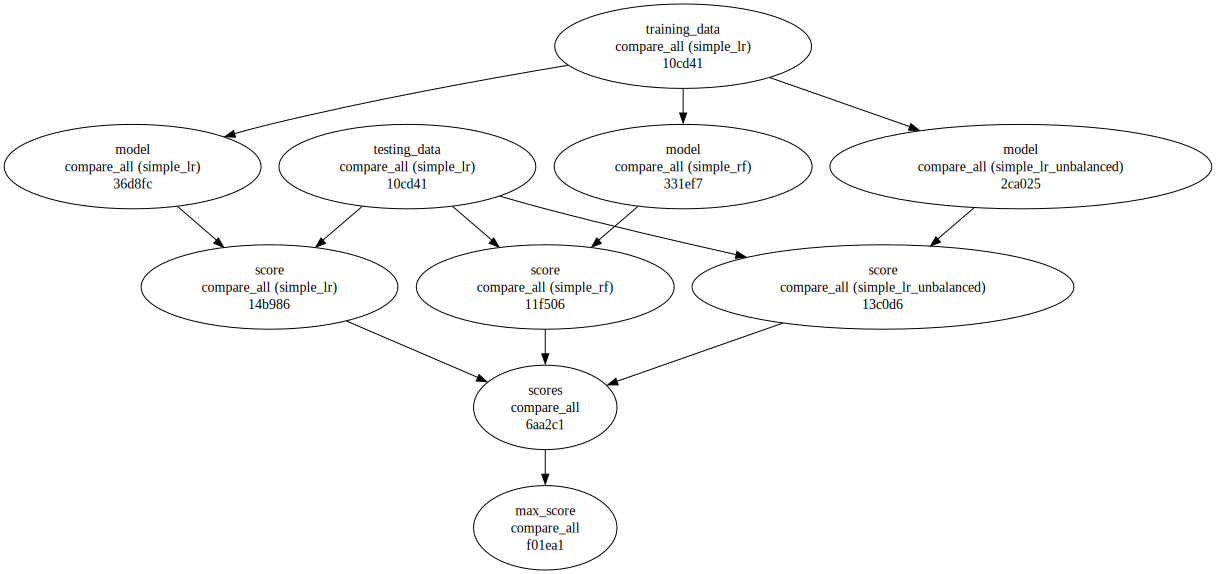

In [7]:
compare_all.outputs._visualize()

In [8]:
compare_all.outputs.filter("model").artifacts

[Artifact 'model', Artifact 'model', Artifact 'model']

In [9]:
compare_all.outputs.filter("model").filter("simple_rf").artifacts

[Artifact 'model']

In [10]:
compare_all.outputs.filter("simple_lr").artifacts

[Artifact 'score',
 Artifact 'model',
 Artifact 'training_data',
 Artifact 'testing_data']

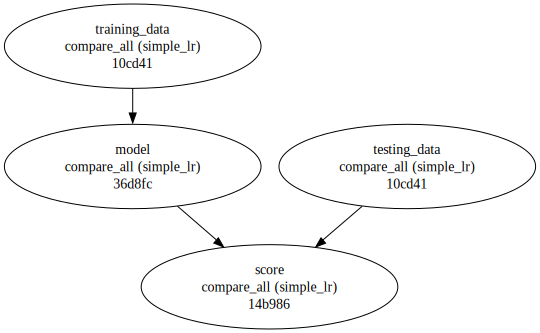

In [12]:
compare_all.outputs.filter("simple_lr")._visualize()

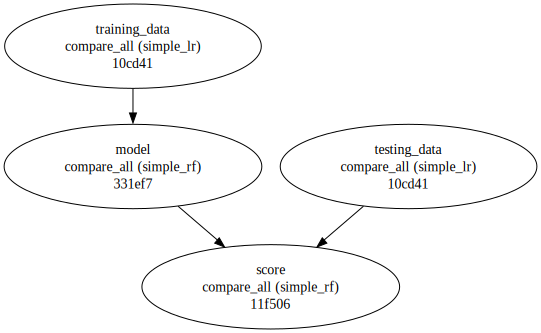

In [13]:
compare_all.outputs.filter("simple_rf")._visualize()

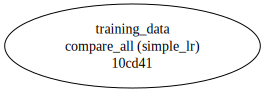

In [16]:
compare_all.outputs.filter("simple_rf").filter("training_data")._visualize()

In [21]:
compare_all.outputs.filter("simple_rf").artifacts

[Artifact 'score', Artifact 'model']

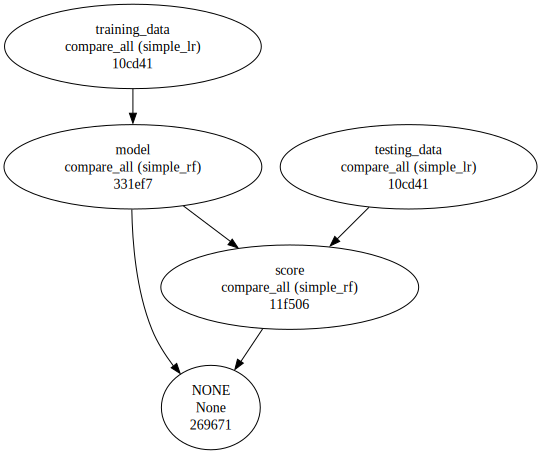

In [27]:
compare_all.outputs.filter("simple_rf").resolve()._visualize()

In [29]:
compare_all.outputs.filter("simple_rf").filter("model").resolve()

Artifact 'model'

In [14]:
compare_all.outputs.filter("simple_rf").filter("model").filter("training_data").artifacts

[Artifact 'training_data']

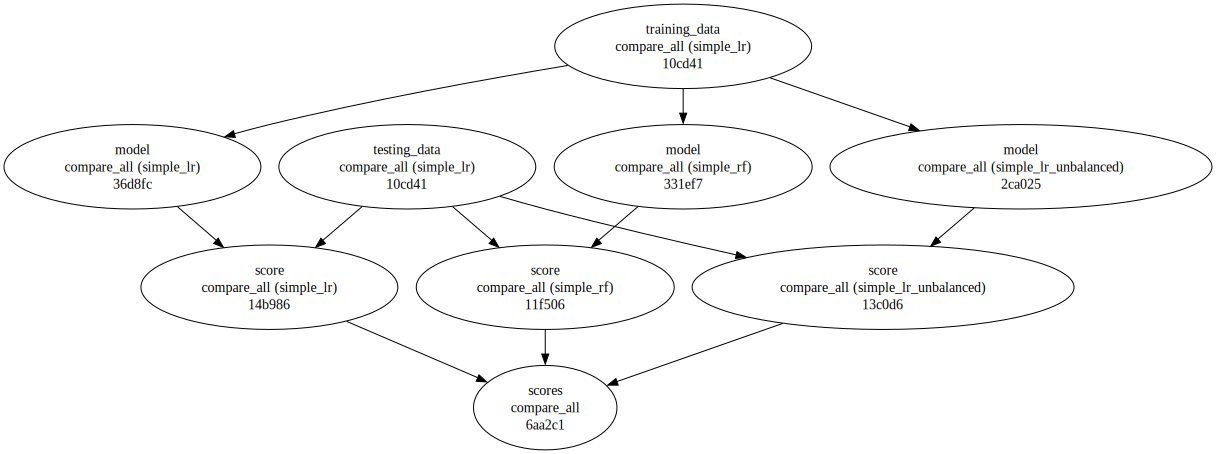

In [20]:
compare_all.outputs.filter("compare_all")._visualize()

In [ ]:
ArtifactList("wat", compare_all.outputs.filter("model").artifacts)._visualize()

In [ ]:
from IPython.display import display
import ipywidgets as ipw
out1 = ipw.Output()
with out1:
    display(simple_lr.outputs._visualize())
out2 = ipw.Output()
with out2:
    display(simple_rf.outputs._visualize())
ipw.HBox([out1, out2])
# in principle, _these_ shouldn't be affected. only the corresponding artifacts within the compare_all experiment

In [ ]:
compare_all.outputs.dependencies()[0].dependencies()[0].dependencies()

In [17]:
compare_all.artifacts.artifacts

[ArtifactList('outputs', []),
 Artifact 'outputs',
 Artifact 'outputs',
 Artifact 'score',
 Artifact 'model',
 Artifact 'training_data',
 Artifact 'training_data',
 Artifact 'testing_data',
 Artifact 'model',
 Artifact 'testing_data',
 Artifact 'training_data',
 Artifact 'testing_data',
 Artifact 'score',
 Artifact 'score',
 Artifact 'model',
 Artifact 'training_data',
 Artifact 'training_data',
 Artifact 'testing_data',
 Artifact 'model',
 Artifact 'testing_data',
 Artifact 'training_data',
 Artifact 'testing_data',
 Artifact 'score',
 Artifact 'score',
 Artifact 'model',
 Artifact 'training_data',
 Artifact 'training_data',
 Artifact 'testing_data',
 Artifact 'model',
 Artifact 'testing_data',
 Artifact 'training_data',
 Artifact 'testing_data',
 Artifact 'score',
 ArtifactList('scores', [Artifact 'score', Artifact 'score', Artifact 'score']),
 Artifact 'scores',
 Artifact 'scores',
 Artifact 'max_score']

In [ ]:
compare_all.alg_experiments[0].artifacts.artifacts

In [ ]:
compare_all.outputs.context

In [ ]:
# dict(globals(), **locals())

In [ ]:
compare_all.outputs.dependencies()[0][0].dependencies()[0].dependencies()[0].hash_debug

In [23]:
compare_all.outputs.artifact_list()

[Artifact 'max_score',
 ArtifactList('scores', [Artifact 'score', Artifact 'score', Artifact 'score']),
 Artifact 'score',
 Artifact 'model',
 Artifact 'training_data',
 Artifact 'testing_data',
 Artifact 'score',
 Artifact 'model',
 Artifact 'score',
 Artifact 'model']

In [ ]:
compare_all.outputs.artifact_list_debug()

In [ ]:
compare_all.outputs.artifact_tree()

In [ ]:
compare_all.run()

In [ ]:
simple_lr.run()

---

In [ ]:
from artifact import Artifact

a1 = Artifact("test1")
a2 = Artifact("test2")

a1.name, a2.name

In [ ]:
a1.pointer = a2

In [ ]:
a1.name, a2.name

In [ ]:
a1 == a2

In [ ]:
a3 = Artifact("test3")
a4 = Artifact("test4")

a3.replace(a4)

In [ ]:
a3.name, a4.name

In [ ]:
a3.name, a3._name

In [ ]:
id(a3), id(a4)

In [ ]:
a3.internal_id, a4.internal_id

In [ ]:
a3 == a4

In [ ]:
from stage import stage

In [ ]:
@stage([Artifact("something")])
def dothing(a):
    return a + 4

a5 = Artifact("test5")
a6 = dothing(a5)

In [ ]:
a6.dependencies()[0].name

The below should now say test7

In [ ]:
a7 = Artifact("test7")
a5.replace(a7)
a6.dependencies()[0].name

In [ ]:
a8 = Artifact("test8")
a9 = dothing(a8)

the below should still say test8, we only called replace on the copy, not what the actual dependency of a9

In [ ]:
a10 = a8.copy()
a11 = Artifact("test11")
a10.replace(a11)
a9.dependencies()[0].name

---

In [ ]:
which_is_best.outputs.compute()

In [ ]:
lr_vs_rf

In [ ]:
lr_vs_rf.models[0]

In [ ]:
lr_vs_rf.outputs.compute.args[1].compute.outputs.object

In [ ]:
lr_vs_rf.outputs.compute()

In [ ]:
lr_vs_rf.outputs.artifact_tree()

In [ ]:
lr_vs_rf.scores

In [ ]:
Artifacts["lr_vs_rf.outputs"].artifacts

In [ ]:
Artifacts["lr_vs_rf.outputs"].compute_hash()

In [ ]:
lr_vs_rf.models[1]

In [ ]:
smaller = lr_vs_rf.modify(name="smaller", model_set=[lr_vs_rf.model_set[0]])

In [ ]:
smaller.map()

In [ ]:
#from new_concepts import DataTest, Experiment
from new_concepts import Experiment, Artifact, Stage, stage, this_is_thing, this_is_tuple, DataTest, ModelTest1, live_test, ModelTest2, ModelTest3, ModelTest4, ModelTest5, ModelTest6, DataTest2

In [ ]:
this_is_thing()()

In [ ]:
t = this_is_thing()
t

In [ ]:
t.function.__name__

In [ ]:
tout = t()
tout

In [ ]:
tout.object

In [ ]:
t

In [ ]:
t2 = this_is_tuple()
t2

In [ ]:
d = DataTest("test")

In [ ]:
d

In [ ]:
d.real_thing

In [ ]:
d.real_thing.compute()

In [ ]:
d

In [ ]:
d.act_t1, d.act_t2

In [ ]:
d.act_t1.compute()

In [ ]:
d

In [ ]:
m1 = ModelTest1("m1", test=d)
m1

In [ ]:
m1.model.compute()

In [ ]:
m1.model.compute()

In [ ]:
d

In [ ]:
m1.test

In [ ]:
m1

In [ ]:
m2 = ModelTest1("m2", test=DataTest("d2"))

In [ ]:
m2

In [ ]:
m2.model.compute()

In [ ]:
m3 = live_test()
m3

In [ ]:
m3.final_model.compute()

In [ ]:
m4 = ModelTest2("m4_2", test=DataTest("d4"))
m4

In [ ]:
m4.model.compute()

In [ ]:
this_is_thing

In [ ]:
m5 = ModelTest4("m5_4", test=DataTest("d5"))
m5

In [ ]:
m5.model.compute()

In [ ]:
m5

In [ ]:
m6 = ModelTest5(name="m6_5", test=DataTest(name='d6'))
m6

In [ ]:
m6.model.compute()

In [ ]:
m7 = ModelTest6("m7_6", test=DataTest2("d7"))
m7

In [ ]:
from dataclasses import dataclass

@dataclass
class thing(Experiment):
    my_thing: Artifact = lambda self: this_is_tuple("5")

In [ ]:
t = thing
t